# Ford GoBike Trip Data Exploration
## by Daniel Patterson

## Preliminary Wrangling

The dataset used for this project is the set of trip records for Ford's GoBike bike sharing system in the San Francisco bay area publicly available on their website as of November 8, 2018. These trip records include anonymized information regarding the time, location, bike, and user for trips using GoBike bikes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os

%matplotlib inline

### Gather Data
Programmatically download all of the Ford GoBike trip data available at https://www.fordgobike.com/system-data.

In [2]:
# 2017 data is posted in a single csv file
file = '2017_fordgobike.csv'
if not os.path.exists(file):
    url = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
    r = requests.get(url)

    if r.status_code == 200:
        with open(file, 'wb') as outfile:
            outfile.write(r.content)
    else:
        print(url,' not found')

# 2018 data is posted in monthly zipped csv files
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if not os.path.exists(file):
        url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month + '-fordgobike-tripdata.csv.zip'
        r = requests.get(url)

        if r.status_code == 200:
            with open(file, 'wb') as outfile:
                outfile.write(r.content)
        else:
            print(url,' not found')

https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip  not found
https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip  not found


In [3]:
# load 2017 data in to a dataframe
trips_2017 = pd.read_csv('2017_fordgobike.csv')
trips_2017.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
306365,751,2017-09-26 18:15:24.8620,2017-09-26 18:27:56.7280,70,Central Ave at Fell St,37.773311,-122.444293,70,Central Ave at Fell St,37.773311,-122.444293,3014,Customer,1989.0,Female
416786,627,2017-08-23 08:24:54.0900,2017-08-23 08:35:21.1840,72,Page St at Scott St,37.772406,-122.435650,59,S Van Ness Ave at Market St,37.774814,-122.418954,1781,Subscriber,1986.0,Male
423877,527,2017-08-20 17:45:47.2040,2017-08-20 17:54:34.5380,197,El Embarcadero at Grand Ave,37.808848,-122.249680,181,Grand Ave at Webster St,37.811377,-122.265192,2051,Subscriber,1988.0,Female
365823,452,2017-09-08 19:07:13.6990,2017-09-08 19:14:46.5330,181,Grand Ave at Webster St,37.811377,-122.265192,194,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,2513,Subscriber,1986.0,Male
89621,272,2017-11-30 09:26:35.2900,2017-11-30 09:31:08.1660,163,Lake Merritt BART Station,37.797320,-122.265320,186,Lakeside Dr at 14th St,37.801319,-122.262642,2352,Subscriber,1983.0,Male


In [4]:
# load 2018 data in to a dictionary containing a dataframe for each month
dict_2018 = {}
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        dict_2018[month] = pd.read_csv(file)

dict_2018['01'].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
36081,368,2018-01-22 12:01:48.9520,2018-01-22 12:07:57.7980,33,Golden Gate Ave at Hyde St,37.781650,-122.415408,59,S Van Ness Ave at Market St,37.774814,-122.418954,1966,Subscriber,1988.0,Male,No
17955,552,2018-01-27 09:57:31.6660,2018-01-27 10:06:43.8560,127,Valencia St at 21st St,37.756708,-122.421025,124,19th St at Florida St,37.760447,-122.410807,3299,Subscriber,1978.0,Female,No
23368,571,2018-01-25 17:14:53.6850,2018-01-25 17:24:25.0240,176,MacArthur BART Station,37.828410,-122.266315,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,3579,Subscriber,1981.0,Male,No
82659,584,2018-01-05 16:28:44.2600,2018-01-05 16:38:29.0670,243,Bancroft Way at College Ave,37.869360,-122.254337,245,Downtown Berkeley BART,37.870348,-122.267764,553,Subscriber,1994.0,Male,No
56371,479,2018-01-16 08:14:12.7120,2018-01-16 08:22:12.2110,196,Grand Ave at Perkins St,37.808894,-122.256460,182,19th Street BART Station,37.809013,-122.268247,1834,Subscriber,1978.0,Male,No


### Assess and Clean Data

In [5]:
# check if column names match across 2018 monthly dataframes
mismatches_2018 = 0
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):   
        mismatches_2018 = mismatches_2018 + (dict_2018['01'].columns != dict_2018[month].columns).sum()
        
print('Number of mismatched columns in 2018 dataframes: ', mismatches_2018)

Number of mismatched columns in 2018 dataframes:  0


In [6]:
# look at 2017 columns
trips_2017.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

In [7]:
# look at 2018 columns
dict_2018['01'].columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

**Tidiness Cleaning**<br>
There are 11 dataframes containing records for the same observational unit: a GoBike trip. To simplify the rest of our assessment and cleaning, first stack the 11 dataframes in to a single table. To do this, we must align the columns between the 2017 and 2018 dataframes by dropping the 'bike_share_for_all_trip' column in the 2018 dataframes.

In [8]:
# stack 2018 monthly dataframes
list_2018 = []
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        list_2018.append(dict_2018[month])
        
trips_2018 = pd.concat(list_2018, ignore_index = True)
trips_2018.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
620093,566,2018-05-01 14:06:34.5870,2018-05-01 14:16:01.2770,175.0,49th St at Telegraph Ave,37.835946,-122.262366,189.0,Genoa St at 55th St,37.839649,-122.271756,3412,Subscriber,1981.0,Male,No
939899,745,2018-07-13 15:35:18.0360,2018-07-13 15:47:43.3530,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,781,Customer,1982.0,Female,No
863038,1012,2018-07-25 08:39:23.6090,2018-07-25 08:56:16.3990,70.0,Central Ave at Fell St,37.773311,-122.444293,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2632,Subscriber,1993.0,Female,No
1499738,1247,2018-10-16 07:10:11.2100,2018-10-16 07:30:58.6860,106.0,Sanchez St at 17th St,37.763242,-122.430675,16.0,Steuart St at Market St,37.794130,-122.394430,3675,Subscriber,1961.0,Female,No
1171650,238,2018-08-07 12:26:13.6250,2018-08-07 12:30:12.0320,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,337.0,Webster St at 19th St,37.806970,-122.266588,499,Subscriber,1990.0,Male,No


In [9]:
# drop bike_share_for_all_trip column and stack 2017 and 2018 dataframes
trips_2018 = trips_2018.drop(['bike_share_for_all_trip'], axis = 1)
trips = pd.concat([trips_2017, trips_2018], ignore_index = True)
trips.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
256770,893,2017-10-10 17:34:56.8130,2017-10-10 17:49:50.0100,78.0,Folsom St at 9th St,37.773717,-122.411647,134.0,Valencia St at 24th St,37.752428,-122.420628,2132,Subscriber,1979.0,Female
1333684,406,2018-06-01 18:00:44.8880,2018-06-01 18:07:31.1640,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,-122.256460,1572,Customer,1987.0,Male
1994060,1669,2018-10-19 11:17:16.3590,2018-10-19 11:45:05.6540,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98.0,Valencia St at 16th St,37.765052,-122.421866,2478,Subscriber,1977.0,Male
634456,315,2018-02-22 21:17:20.8440,2018-02-22 21:22:36.7440,241.0,Ashby BART Station,37.852477,-122.270213,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,13,Subscriber,1979.0,Male
1505944,224,2018-07-06 17:55:52.0720,2018-07-06 17:59:36.3440,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,109.0,17th St at Valencia St,37.763316,-122.421904,3144,Subscriber,1988.0,Male


In [10]:
# look at data types and null value counts
pd.options.display.max_info_rows = trips.shape[0]+1
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117923 entries, 0 to 2117922
Data columns (total 15 columns):
duration_sec               2117923 non-null int64
start_time                 2117923 non-null object
end_time                   2117923 non-null object
start_station_id           2106828 non-null float64
start_station_name         2106828 non-null object
start_station_latitude     2117923 non-null float64
start_station_longitude    2117923 non-null float64
end_station_id             2106828 non-null float64
end_station_name           2106828 non-null object
end_station_latitude       2117923 non-null float64
end_station_longitude      2117923 non-null float64
bike_id                    2117923 non-null int64
user_type                  2117923 non-null object
member_birth_year          1950773 non-null float64
member_gender              1951203 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 242.4+ MB


In [11]:
# look at summary stats for numeric columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2117923.00,2106828.00,2117923.00,2117923.00,2106828.00,2117923.00,2117923.00,2117923.00,1950773.00
mean,928.28,112.25,37.77,-122.35,110.46,37.77,-122.35,2095.03,1982.37
std,2730.27,96.33,0.10,0.16,96.21,0.10,0.16,1191.53,10.51
min,61.00,3.00,37.26,-122.47,3.00,37.26,-122.47,10.00,1881.00
25%,359.00,30.00,37.77,-122.41,28.00,37.77,-122.41,1092.00,1977.00
50%,568.00,81.00,37.78,-122.40,80.00,37.78,-122.40,2129.00,1985.00
75%,892.00,179.00,37.80,-122.29,178.00,37.80,-122.29,3050.00,1990.00
max,86369.00,378.00,45.51,-73.57,378.00,45.51,-73.57,4466.00,2000.00


In [12]:
# check for duplicate rows
sum(trips.duplicated())

0

In [13]:
# check gender value counts
trips['member_gender'].value_counts()

Male      1445068
Female     476761
Other       29374
Name: member_gender, dtype: int64

In [14]:
# check user type value counts
trips['user_type'].value_counts()

Subscriber    1759605
Customer       358318
Name: user_type, dtype: int64

In [15]:
# check earliest and latest trip date in the dataset
trips['start_time'].min(), trips['start_time'].max()

('2017-06-28 09:47:36.3470', '2018-10-31 23:58:54.3210')

**Make ID Columns String Type**<br>
Station IDs and bike ID are numeric when they should be strings. Convert 'start_station_id', 'end_station_id', and 'bike_id' to strings while preserving null values.

In [16]:
# convert non-null float values to strings with no decimal
trips['start_station_id'] = trips['start_station_id'].where(
    trips['start_station_id'].isnull(), trips['start_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))
trips['end_station_id'] = trips['end_station_id'].where(
    trips['end_station_id'].isnull(), trips['end_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))
trips['bike_id'] = trips['bike_id'].astype(str)
trips[['start_station_id','end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117923 entries, 0 to 2117922
Data columns (total 3 columns):
start_station_id    2106828 non-null object
end_station_id      2106828 non-null object
bike_id             2117923 non-null object
dtypes: object(3)
memory usage: 48.5+ MB


**Make Birth Year Integer Type**<br>
Member birth year is a float when it should be an integer. Convert 'member_birth_year' to integer while representing null values as 0.

In [17]:
# convert birth year to integer using 0 to represent null values
trips['member_birth_year'] = trips['member_birth_year'].fillna(0).astype(int)
trips[['member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117923 entries, 0 to 2117922
Data columns (total 1 columns):
member_birth_year    2117923 non-null int32
dtypes: int32(1)
memory usage: 8.1 MB


In [18]:
# check that values are as expected
trips['member_birth_year'].value_counts().head()

0       167150
1988    111516
1987     97533
1985     92794
1989     91730
Name: member_birth_year, dtype: int64

**Make Start and End Times Datetime Type**<br>
Start and end times are not datetime types. Convert 'start_time' and 'end_time' to datetime type.

In [19]:
# convert start and end times to datetime type
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])
trips[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117923 entries, 0 to 2117922
Data columns (total 2 columns):
start_time    2117923 non-null datetime64[ns]
end_time      2117923 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 32.3 MB


**Calculate Rough User Ages**<br>
It would be interesting to look at how trips vary across age groups. While we don't have exact birth dates, we can create a rough estimate of user age from their birth year and the trip start date. Represent null ages due to missing birth year by 0.

In [20]:
# set age as the difference between trip start year and birth year if available, otherwise set age to 0
trips.loc[trips['member_birth_year'] == 0, 'rough_age'] = 0
trips.loc[trips['member_birth_year'] > 0, 'rough_age'] = trips['start_time'].dt.year - trips['member_birth_year']
trips['rough_age'] = trips['rough_age'].astype(int)
trips['rough_age'].value_counts().head()

0     167150
30    110399
29     96138
31     95174
28     89582
Name: rough_age, dtype: int64

**Convert Trip Duration to Minutes**<br>
I think it would be more natural to look at bike trip durations in minutes rather than seconds. Create a trip duration column in minutes rather than seconds.

In [21]:
# convert seconds to minutes
trips['duration_minutes'] = trips['duration_sec']/60
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rough_age,duration_minutes
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.78,-122.43,43,San Francisco Public Library (Grove St at Hyde...,37.78,-122.42,96,Customer,1987,Male,30,1335.17
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.78,-122.40,96,Dolores St at 15th St,37.77,-122.43,88,Customer,1965,Female,52,1313.33
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.87,-122.27,245,Downtown Berkeley BART,37.87,-122.27,1094,Customer,0,NaN,0,762.80
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.77,-122.41,5,Powell St BART Station (Market St at 5th St),37.78,-122.41,2831,Customer,0,NaN,0,1036.20
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.87,-122.26,247,Fulton St at Bancroft Way,37.87,-122.27,3167,Subscriber,1997,Female,20,726.72


In [22]:
# take one more look at descriptive stats for numeric variables
trips.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,rough_age,duration_minutes
count,2117923.00,2117923.00,2117923.00,2117923.00,2117923.00,2117923.00,2117923.00,2117923.00
mean,928.28,37.77,-122.35,37.77,-122.35,1825.92,32.60,15.47
std,2730.27,0.10,0.16,0.10,0.16,534.58,13.86,45.50
min,61.00,37.26,-122.47,37.26,-122.47,0.00,0.00,1.02
25%,359.00,37.77,-122.41,37.77,-122.41,1973.00,26.00,5.98
50%,568.00,37.78,-122.40,37.78,-122.40,1984.00,32.00,9.47
75%,892.00,37.80,-122.29,37.80,-122.29,1989.00,40.00,14.87
max,86369.00,45.51,-73.57,45.51,-73.57,2000.00,137.00,1439.48


### What is the structure of your dataset?

After stacking, our dataset is a single table of GoBike trip records where each row contains information related to a single trip.

### What is/are the main feature(s) of interest in your dataset?

I think the main features of interest for this dataset would be to better understand the characteristics of the user population so Ford can better meet the needs of existing users and identify potential areas to attract new users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Information about users such as birth year and gender can give us insight regarding the user population. Information about trip location and duration can give us insight regarding how the population utilizes GoBikes.

## Univariate Exploration

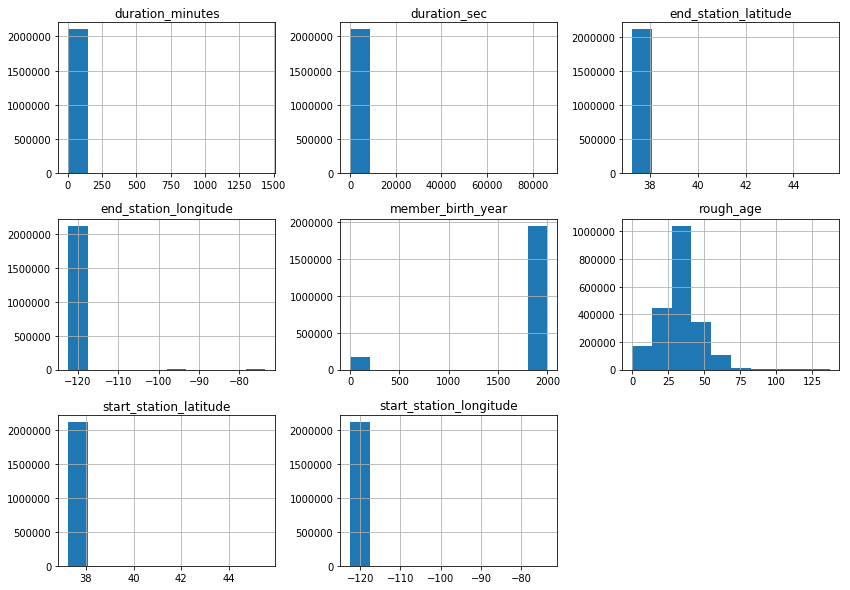

In [23]:
# get a quick overview of the distributions of numeric variables
trips.hist(figsize = (14,10));

Clearly there are some outliers in the duration, latitude, and longitude histograms that create a right skew and lead to very uninformative graphs where practically all of the values are placed in a single bin. Also, the birth year and rough age histograms would be much more useful if we removed 0s from those columns prior to plotting.

**Duration Histogram**<br>
Given the right skew of duration above, let's look at a log transformation of trip duration.

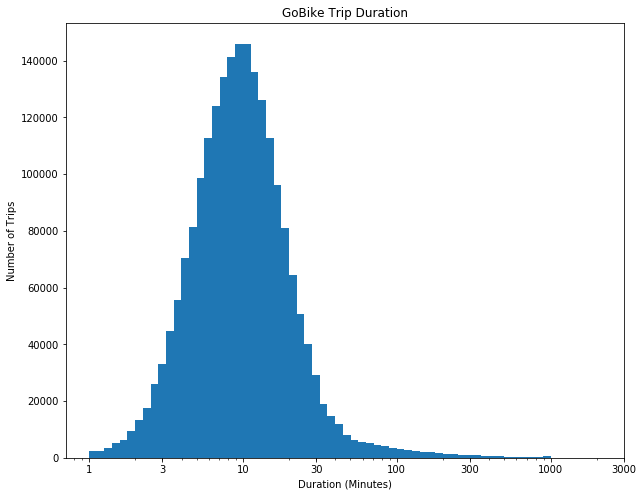

In [24]:
# create a histogram of duration on log scale
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=(10,8))
plt.hist(data = trips, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Trips')
plt.title('GoBike Trip Duration');

The log transformation of duration looks roughly normally distributed with an elongated right tail. Although there are some outliers in terms of trip duration, the maximum is still only about 24 hours, which seems plausible and I don't think needs to be excluded on that fact alone.

**Rough Age Histogram**<br>
We can improve the histogram of rough user ages by excluding users with no age (currently represented by 0) and adjusting the bins.

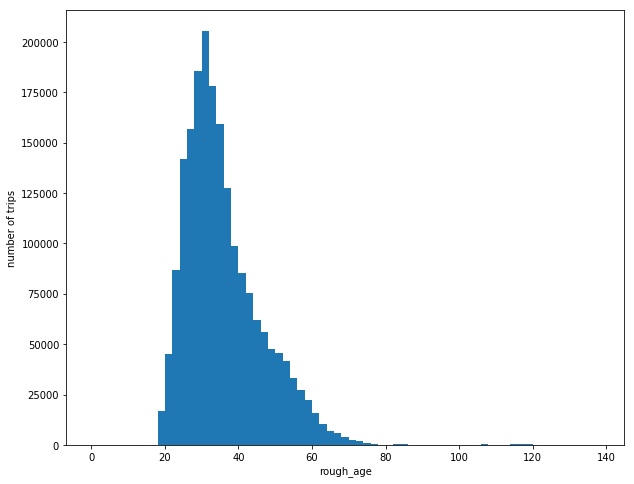

In [25]:
plt.figure(figsize=(10,8))
trips_age = trips.query('rough_age > 0')
bins = np.arange(0, trips_age['rough_age'].max()+2, 2)
plt.hist(data = trips_age, x = 'rough_age', bins = bins)
plt.xlabel('rough_age')
plt.ylabel('number of trips');

The age of users appears to be right skewed and centered around ages 20 to 45. I would guess that there is a minimum age of 18 required to use a GoBike because that is the minimum age observed. There are a handful of trips with users over age 100, but it isn't enough to worry about trying to identify which are legitimate or not in my opinion.

**Trip Frequency Time Series**<br>
To get a sense for how GoBike usage has been growing over time I think it would make the most sense to look at the number of trips per week over time. I expect usage will be influenced by the day of the week which is why we might prefer to look at the week level rather than the month level, along with the fact that some months have more days than others.

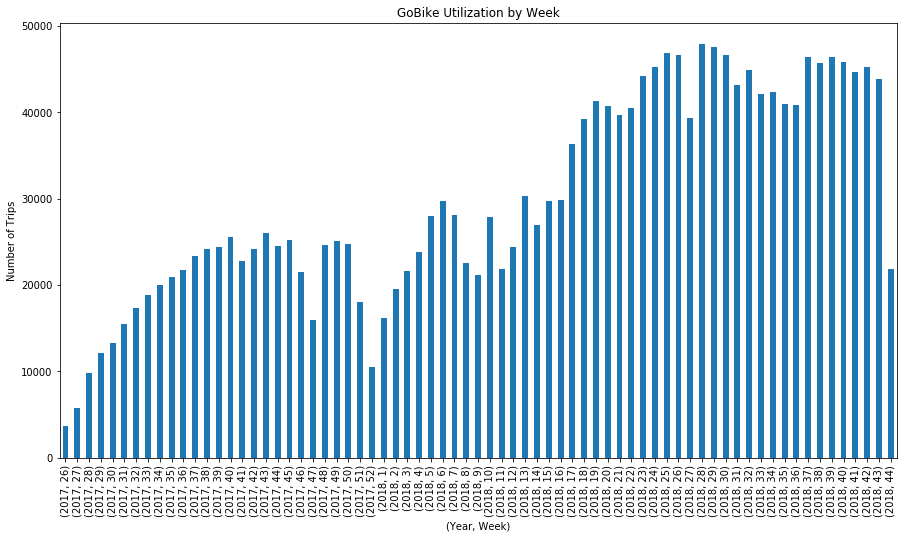

In [26]:
# create a bar chart illustrating growth in number of trips per week over time
base_color = sb.color_palette()[0]
trips['start_year'] = trips['start_time'].dt.year
trips['start_week'] = trips['start_time'].dt.week
trips_per_week = trips.groupby(['start_year', 'start_week'])['bike_id'].count()
trips_per_week.plot(kind='bar', figsize=(15,8), color = base_color)
plt.xlabel('(Year, Week)')
plt.ylabel('Number of Trips')
plt.title('GoBike Utilization by Week');

We can see that there has been a fair amount of growth in GoBike usage given the slightly more than one year's worth of data we have. The most recent week is likely not complete which is why we see a large dip. The same might be true of data for the earliest trips in this data because the starting point is so low, or it may have simply been a very fast growth at the beginning. I can also see a notable dip in usage around the last week of 2017, which makes sense that people would be commuting less during the holiday break.

**Day of the Week Bar Chart**<br>
To see whether usage patterns vary by day of the week, we can plot the number of trips per day in a bar chart.

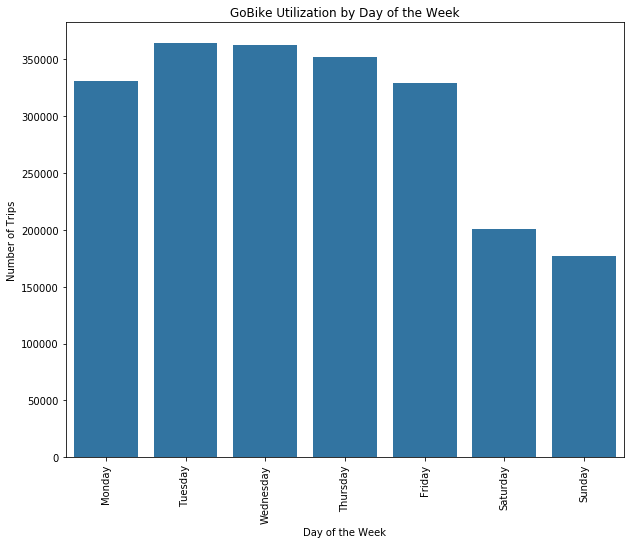

In [27]:
# create a bar chart counting trips per day of the week
trips['start_day_of_week'] = trips['start_time'].dt.weekday
trips_per_week = trips.groupby('start_day_of_week')['bike_id'].count()

plt.figure(figsize=(10,8))
sb.countplot(data = trips, x = 'start_day_of_week', color = base_color)

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels, rotation = 90)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('GoBike Utilization by Day of the Week');

There is generally higher usage during the week as opposed to on weekends.

**User Gender Bar Chart**<br>
To look at the gender composition of users, we can plot the number of trips for each gender in a bar chart.

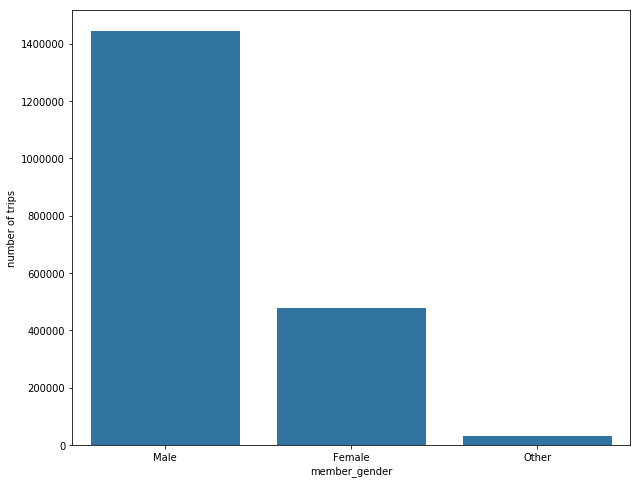

In [28]:
# create a bar chart counting trips by user gender
plt.figure(figsize=(10,8))
sb.countplot(data = trips, x = 'member_gender', color = base_color)
plt.ylabel('number of trips');

The majority of trips are taken by male users.

**User Type Bar Chart**<br>
To look at what share of users are subscribers, we can plot the number of trips for each user type in a bar chart.

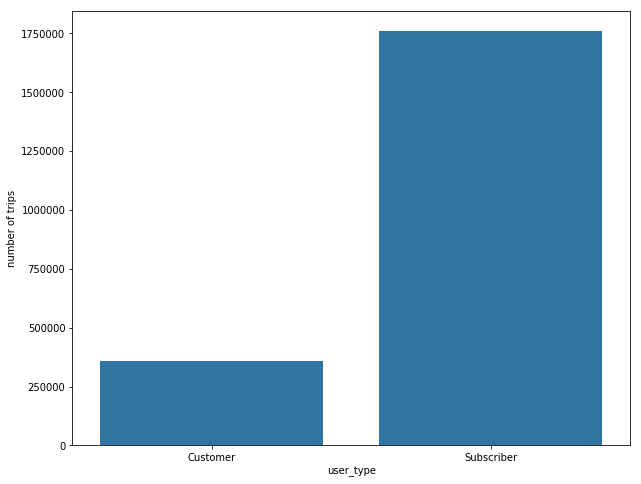

In [29]:
# create a bar chart counting trips by user type
plt.figure(figsize=(10,8))
sb.countplot(data = trips, x = 'user_type', color = base_color)
plt.ylabel('number of trips');

The majority of trips are taken by Subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

A quick plot of histograms for each numeric variable in the dataframe was not nearly as informative as individually tailored plots. I performed a log transformation on trip duration due to the observed right skew.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I adjusted the age histogram to exclude ages of 0 which really indicates that no age was available rather than hordes of newborns riding bikes. There were a couple unusual dips in usage observed in the time series plot which may be due to lower usage near holidays or incomplete data.

## Bivariate Exploration

**Latitude and Longitude Scatterplot**<br>
Looking at the distribution of latitude and longitude in the describe function above along with the histograms, there are clearly some outlier locations in the data. We can use a scatter plot to identify the outliers and then look more closely at those trips to decide if we want to remove them.

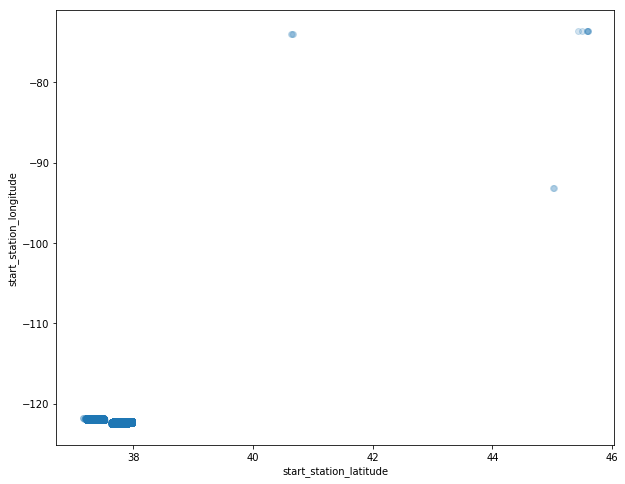

In [30]:
# plot a scatter of latitude and longitude to identify outlier trip locations
plt.figure(figsize=(10,8))
sb.regplot(data = trips, x = 'start_station_latitude', y = 'start_station_longitude', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/5});

Using jitter and transparency we can see that the majority of locations are near the (38,-120) position and there are three other distinct areas with very few trips. We can look at these outliers by querying based on longitude.

In [31]:
# look more closely at outlier locations
trips.query('start_station_longitude > -110')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rough_age,duration_minutes,start_year,start_week,start_day_of_week
1153196,283,2018-06-29 08:57:14.525,2018-06-29 09:01:57.582,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4295,Subscriber,1977,Male,41,4.72,2018,26,4
1174814,12944,2018-06-26 10:59:12.446,2018-06-26 14:34:57.186,NaN,NaN,44.95,-93.22,NaN,NaN,44.95,-93.22,3758,Subscriber,1981,Female,37,215.73,2018,26,1
1199788,1443,2018-06-22 13:36:13.056,2018-06-22 14:00:16.996,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4295,Subscriber,1977,Male,41,24.05,2018,25,4
1277552,191,2018-06-11 08:23:37.019,2018-06-11 08:26:48.599,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4295,Subscriber,1989,Male,29,3.18,2018,24,0
1335753,69,2018-06-01 13:56:04.027,2018-06-01 13:57:13.648,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1976,Male,42,1.15,2018,22,4
1335770,126,2018-06-01 13:51:52.771,2018-06-01 13:53:58.967,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1987,Male,31,2.10,2018,22,4
1335791,67,2018-06-01 13:47:53.131,2018-06-01 13:49:00.368,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1987,Male,31,1.12,2018,22,4
1604948,501,2018-08-21 12:11:52.500,2018-08-21 12:20:13.500,NaN,NaN,45.50,-73.57,NaN,NaN,45.51,-73.57,4425,Subscriber,1980,Male,38,8.35,2018,34,1
1611788,1023,2018-08-20 12:07:06.500,2018-08-20 12:24:09.500,NaN,NaN,45.50,-73.57,NaN,NaN,45.51,-73.57,4425,Subscriber,1980,Male,38,17.05,2018,34,0
1612386,94,2018-08-20 09:53:14.500,2018-08-20 09:54:48.500,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4425,Subscriber,1980,Male,38,1.57,2018,34,0


Spot checking the three general locations on google indicates these trips occurred in Montreal, Minneapolis, and New York City. None of these trips have a station ID. Perhaps these were part of some pilot program in those areas, but let's focus on the San Francisco Bay Area trips and drop the others.

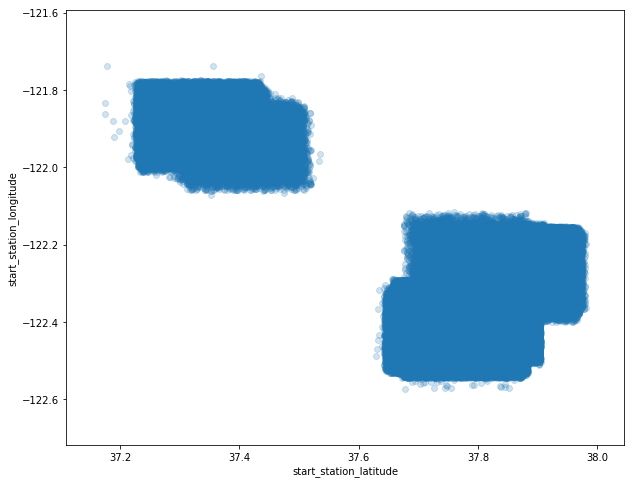

In [32]:
# drop outlier trip locations then look at the scatter of latitude and longitude again
trips = trips.query('start_station_longitude < -110')

plt.figure(figsize=(10,8))
sb.regplot(data = trips, x = 'start_station_latitude', y = 'start_station_longitude', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/5});

Now we see two clearly distinct regions where GoBike trips occur. Spot checking latitude and longitude from those two areas shows that the upper left appears to be trips within the San Jose area while the lower right appears to be trips within the San Francisco area.

**Day of the Week by User Type Clustered Bar Chart**<br>
I would expect the drop in weekend usage observed above to be driven by fewer users biking to work on the weekend. I would also expect work commuters to be more likely to be subscribed if they bike every day. Let's see if the relative share of subscribed usage also drops on weekends using a clustered bar chart.

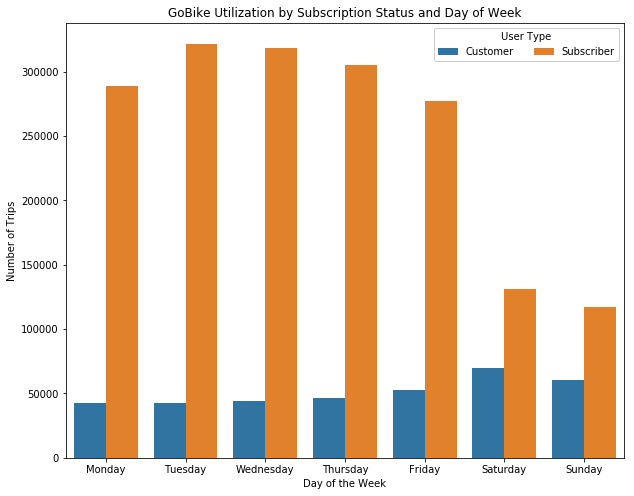

In [33]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = trips, x = 'start_day_of_week', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('GoBike Utilization by Subscription Status and Day of Week');

As expected, the share of trips by subscribers is much lower on the weekend than during the week, however subscribers still take about double the amount of trips on the weekend as non-subscribers (Customer).

**Trip Duration by Day of the Week Box Plots**<br>
To get a sense of whether trip duration varies by day of the week we can compare the box plots of trip duration by the day of week.

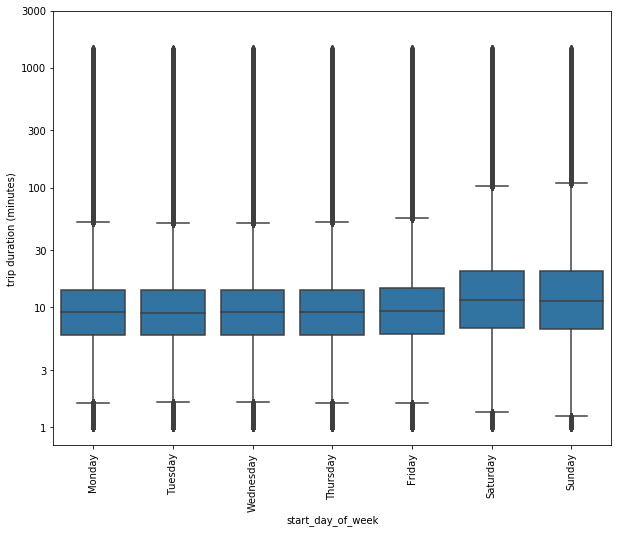

In [34]:
# create box plots of trip duration by day of week
trips['log_duration_minutes'] = np.log10(trips['duration_minutes'])
plt.figure(figsize=(10,8))
sb.boxplot(data = trips, x = 'start_day_of_week', y = 'log_duration_minutes', color = base_color)

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.ylabel('trip duration (minutes)');

While there are a lot of outlier trips beyond the whiskers for every day of the week, we can see that weekend trips tend to be slightly longer and have more variation in duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The share of riders that are subscribed is much higher during the week than on weekends. Trips tend to be slightly longer and have more variation in duration on weekends compared to weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed a small amount of trips with outlier latitude and longitude which I cleaned from the data. The remaining trips occur in two distinct regions: San Francisco and San Jose.

## Multivariate Exploration

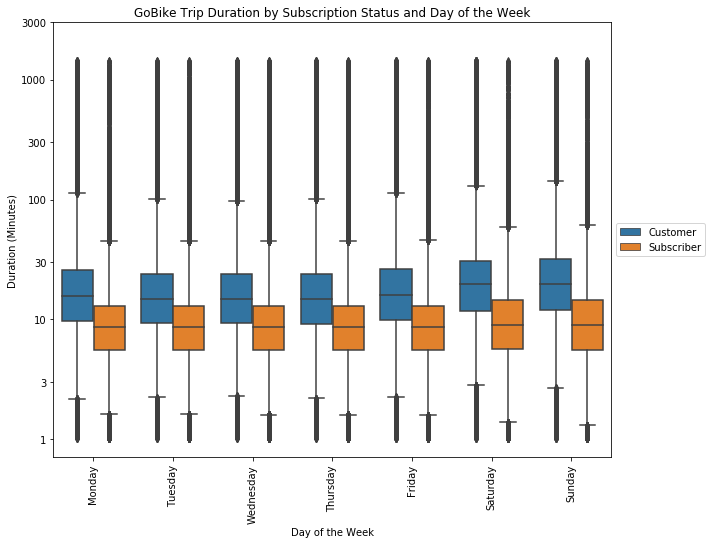

In [35]:
# create clustered box plots to compare trip duration by day of week and user type
plt.figure(figsize=(10,8))
sb.boxplot(data = trips, x = 'start_day_of_week', y = 'log_duration_minutes', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Day of the Week')
plt.ylabel('Duration (Minutes)')
plt.title('GoBike Trip Duration by Subscription Status and Day of the Week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the clustered box plots above we can see that subscribers tend to have shorter trips than non-subscribers regardless of the day of the week.

### Were there any interesting or surprising interactions between features?

It is interesting that the increased trip duration on weekends mostly comes from non-subscribers.

In [36]:
# store dataframe in csv
trips.to_csv('trips.csv')